In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

from matplotlib.colors import ListedColormap 

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, log_loss, brier_score_loss, confusion_matrix
from sklearn.decomposition import PCA

# Display all columns and rows of the dataset
pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv("/content/gdrive/MyDrive/Thesis/MODELING/Differences_Opp_New.csv")

In [ ]:
# Size of dataset
df.shape 

(28990, 314)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,match_index,tourney_id,tournament,country,location,surface,court,draw_size,series,money_prize,tourney_date,year,month,day,match_num,best_of,round,A_id,A_name,B_id,B_name,A_rank,B_rank,A_hand,A_ht,A_ioc,A_age,B_hand,B_ht,B_ioc,B_age,A_ace,A_df,A_svpt,A_1stIn,A_1stWon,A_2ndWon,A_SvGms,A_bpSaved,A_bpFaced,B_ace,B_df,B_svpt,B_1stIn,B_1stWon,B_2ndWon,B_SvGms,B_bpSaved,B_bpFaced,A_rank_points,B_rank_points,A_B365,B_B365,A_PS,B_PS,A_Max,B_Max,A_Avg,B_Avg,Label,home_advantage,match_quality,A_rank_log,B_rank_log,A_rank_points_log,B_rank_points_log,surface_court,A_matches_per_surface,A_wins_per_surface,A_losses_per_surface,A_finals_per_surface,A_titles_per_surface,B_matches_per_surface,B_wins_per_surface,B_losses_per_surface,B_finals_per_surface,B_titles_per_surface,A_surface_percentage,B_surface_percentage,A_wins_career,A_losses_career,A_matches_career,A_finals_career,A_titles_career,B_wins_career,B_losses_career,B_matches_career,B_finals_career,B_titles_career,A_wins_year,A_losses_year,A_matches_year,A_finals_year,A_titles_year,B_wins_year,B_losses_year,B_matches_year,B_finals_year,B_titles_year,A_past_games_percentage,B_past_games_percentage,A_wins_tour,A_losses_tour,A_matches_tour,A_finals_tour,A_titles_tour,B_wins_tour,B_losses_tour,B_matches_tour,B_finals_tour,B_titles_tour,A_tour_percentage,B_tour_percentage,A_round_wins,A_round_losses,A_round_matches,A_round_percentage,B_round_wins,B_round_losses,B_round_matches,B_round_percentage,A_AceVsDf_percentage,B_AceVsDf_percentage,A_2ndIn,B_2ndIn,A_1stServeReturnPointsWon,B_1stServeReturnPointsWon,A_2ndServeReturnPointsWon,B_2ndServeReturnPointsWon,A_2ndWon_2ndIn_percentage,B_2ndWon_2ndIn_percentage,A_1stWon_1stIn_percentage,B_1stWon_1stIn_percentage,A_1stIn_1stServe_percentage,B_1stIn_1stServe_percentage,A_bpSaved_percentage,B_bpSaved_percentage,A_over_B,B_over_A,A_oppon_percentage,B_oppon_percentage,A_1stServe_percentage,B_1stServe_percentage,A_1stSPWon_percentage,B_1stSPWon_percentage,A_2ndSPWon_percentage,B_2ndSPWon_percentage,A_1stSRPWon,B_1stSRPWon,A_2ndSRPWon,B_2ndSRPWon,A_1stSRPWon_percentage,B_1stSRPWon_percentage,A_2ndSRPWon_percentage,B_2ndSRPWon_percentage,A_bpWon_percentage,B_bpWon_percentage,A_bpWon,B_bpWon,A_bpConv_percentage,B_bpConv_percentage,A_matches_semester,A_wins_semester,A_losses_semester,B_matches_semester,B_wins_semester,B_losses_semester,A_momentum,B_momentum,A_elo_rating,B_elo_rating,A_wins_recent,A_losses_recent,A_matches_recent,B_wins_recent,B_losses_recent,B_matches_recent,A_winning_streak,A_lossing_streak,A_inactivity,B_winning_streak,B_lossing_streak,B_inactivity,preferred_hand,A_spread,B_spread,rank,age,height,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank_log,rank_points_log,matches_per_surface,wins_per_surface,losses_per_surface,finals_per_surface,titles_per_surface,surface_advantage,wins_career,losses_career,matches_career,finals_career,titles_career,wins_year,losses_year,matches_year,finals_year,titles_year,wins_tour,losses_tour,matches_tour,finals_tour,titles_tour,round_wins,round_losses,round_matches,2ndIn,1stServeReturnPointsWon,2ndServeReturnPointsWon,headtohead,1stSRPWon,2ndSRPWon,bpWon,matches_semester,wins_semester,losses_semester,momentum,elo_rating,wins_recent,losses_recent,matches_recent,winning_streak,lossing_streak,inactivity,spread,surface_percentage,past_games_percentage,tour_percentage,round_percentage,aceVsDf_percentage,2ndWon_2ndIn_percentage,1stWon_1stIn_percentage,1stIn_1stServe_percentage,bpSaved_percentage,oppon_percentage,1stServe_percentage,1stSPWon_percentage,2ndSPWon_percentage,1stSRPWon_percentage,2ndSRPWon_percentage,bpWon_percentage,bpConv_percentage,B365,PS,Max,Avg,ace_opp,df_opp,svpt_opp,1stIn_opp,1stWon_opp,2ndWon_opp,SvGms_opp,bpSaved_opp,bpFaced_opp,matches_per_surface_opp,wins_per_surface_opp,losses_per_surface_opp,finals_per_surface_opp,titles_per_surface_opp,wins_career_opp,losses_career_opp,matches_career_opp,finals_career_opp,titles_career_opp,wins_year_opp,loss

`'match_index'` is just a variable that I created to help me with the **Feature Engineering**.

In [ ]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'match_index'], inplace=True)

In [ ]:
df.head()

,Unnamed: 0.1.1,tourney_id,tournament,country,location,surface,court,draw_size,series,money_prize,tourney_date,year,month,day,match_num,best_of,round,A_id,A_name,B_id,B_name,A_rank,B_rank,A_hand,A_ht,A_ioc,A_age,B_hand,B_ht,B_ioc,B_age,A_ace,A_df,A_svpt,A_1stIn,A_1stWon,A_2ndWon,A_SvGms,A_bpSaved,A_bpFaced,B_ace,B_df,B_svpt,B_1stIn,B_1stWon,B_2ndWon,B_SvGms,B_bpSaved,B_bpFaced,A_rank_points,B_rank_points,A_B365,B_B365,A_PS,B_PS,A_Max,B_Max,A_Avg,B_Avg,Label,home_advantage,match_quality,A_rank_log,B_rank_log,A_rank_points_log,B_rank_points_log,surface_court,A_matches_per_surface,A_wins_per_surface,A_losses_per_surface,A_finals_per_surface,A_titles_per_surface,B_matches_per_surface,B_wins_per_surface,B_losses_per_surface,B_finals_per_surface,B_titles_per_surface,A_surface_percentage,B_surface_percentage,A_wins_career,A_losses_career,A_matches_career,A_finals_career,A_titles_career,B_wins_career,B_losses_career,B_matches_career,B_finals_career,B_titles_career,A_wins_year,A_losses_year,A_matches_year,A_finals_year,A_titles_year,B_wins_year,B_losses_year,B_matches_year,B_finals_year,B_titles_year,A_past_games_percentage,B_past_games_percentage,A_wins_tour,A_losses_tour,A_matches_tour,A_finals_tour,A_titles_tour,B_wins_tour,B_losses_tour,B_matches_tour,B_finals_tour,B_titles_tour,A_tour_percentage,B_tour_percentage,A_round_wins,A_round_losses,A_round_matches,A_round_percentage,B_round_wins,B_round_losses,B_round_matches,B_round_percentage,A_AceVsDf_percentage,B_AceVsDf_percentage,A_2ndIn,B_2ndIn,A_1stServeReturnPointsWon,B_1stServeReturnPointsWon,A_2ndServeReturnPointsWon,B_2ndServeReturnPointsWon,A_2ndWon_2ndIn_percentage,B_2ndWon_2ndIn_percentage,A_1stWon_1stIn_percentage,B_1stWon_1stIn_percentage,A_1stIn_1stServe_percentage,B_1stIn_1stServe_percentage,A_bpSaved_percentage,B_bpSaved_percentage,A_over_B,B_over_A,A_oppon_percentage,B_oppon_percentage,A_1stServe_percentage,B_1stServe_percentage,A_1stSPWon_percentage,B_1stSPWon_percentage,A_2ndSPWon_percentage,B_2ndSPWon_percentage,A_1stSRPWon,B_1stSRPWon,A_2ndSRPWon,B_2ndSRPWon,A_1stSRPWon_percentage,B_1stSRPWon_percentage,A_2ndSRPWon_percentage,B_2ndSRPWon_percentage,A_bpWon_percentage,B_bpWon_percentage,A_bpWon,B_bpWon,A_bpConv_percentage,B_bpConv_percentage,A_matches_semester,A_wins_semester,A_losses_semester,B_matches_semester,B_wins_semester,B_losses_semester,A_momentum,B_momentum,A_elo_rating,B_elo_rating,A_wins_recent,A_losses_recent,A_matches_recent,B_wins_recent,B_losses_recent,B_matches_recent,A_winning_streak,A_lossing_streak,A_inactivity,B_winning_streak,B_lossing_streak,B_inactivity,preferred_hand,A_spread,B_spread,rank,age,height,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank_log,rank_points_log,matches_per_surface,wins_per_surface,losses_per_surface,finals_per_surface,titles_per_surface,surface_advantage,wins_career,losses_career,matches_career,finals_career,titles_career,wins_year,losses_year,matches_year,finals_year,titles_year,wins_tour,losses_tour,matches_tour,finals_tour,titles_tour,round_wins,round_losses,round_matches,2ndIn,1stServeReturnPointsWon,2ndServeReturnPointsWon,headtohead,1stSRPWon,2ndSRPWon,bpWon,matches_semester,wins_semester,losses_semester,momentum,elo_rating,wins_recent,losses_recent,matches_recent,winning_streak,lossing_streak,inactivity,spread,surface_percentage,past_games_percentage,tour_percentage,round_percentage,aceVsDf_percentage,2ndWon_2ndIn_percentage,1stWon_1stIn_percentage,1stIn_1stServe_percentage,bpSaved_percentage,oppon_percentage,1stServe_percentage,1stSPWon_percentage,2ndSPWon_percentage,1stSRPWon_percentage,2ndSRPWon_percentage,bpWon_percentage,bpConv_percentage,B365,PS,Max,Avg,ace_opp,df_opp,svpt_opp,1stIn_opp,1stWon_opp,2ndWon_opp,SvGms_opp,bpSaved_opp,bpFaced_opp,matches_per_surface_opp,wins_per_surface_opp,losses_per_surface_opp,finals_per_surface_opp,titles_per_surface_opp,wins_career_opp,losses_career_opp,matches_career_opp,finals_career_opp,titles_career_opp,wins_year_opp,losses_year_opp,matches_year_opp,finals_

# 1. `tourney_id`, `tournament`, `country`


* `'tourney_id'`, `'tournament'` and `'country'` have all the same information. So we do not need them all.

**Note**: To calculate the correlation of a categorical variable with the target value, we firstly need to encode it. 


In [ ]:
cat_list_enc = ['tournament', 'country']

encoder = OrdinalEncoder()
df[cat_list_enc] = df[cat_list_enc].astype(str)
encoder.fit(df[cat_list_enc])
df[cat_list_enc] = encoder.transform(df[cat_list_enc])

In [ ]:
print('Correlation of Target Value with tournament is :',  round(df['Label'].corr(df['tournament']), 3))
print('Correlation of Target Value with tourney_id is :',  round(df['Label'].corr(df['tourney_id']), 3))
print('Correlation of Target Value with country is    :',  round(df['Label'].corr(df['country']), 3))

Correlation of Target Value with tournament is : -0.009
Correlation of Target Value with tourney_id is : 0.006
Correlation of Target Value with country is    : 0.0


Let's keep `'tourney_id'`.

Extra features created: `A_wins_tour`, `B_wins_tour`, `A_losses_tour`, `B_losses_tour`, `A_matches_tour`, `B_matches_tour`, `A_finals_tour`, `B_finals_tour`, `A_titles_tour`, `B_titles_tour`, `A_tour_percentage`, `B_tour_percentage`.

In  order to achieve **symmetry**: `wins_tour`, `losses_tour`, `matches_tour`, `finals_tour`, `titles_tour`, `tour_percentage`

Common Opponent Features:  `wins_tour_opp`, `losses_tour_opp`, `matches_tour_opp`, `finals_tour_opp`, `titles_tour_opp`

In [ ]:
df.drop(columns=['tournament', 'country'], inplace=True)

# 2. `surface`, `court`


* I have `'surface_court'` feature, so I do not need the `'surface'` and the 'court' features, as `'surface_court'` has the same information combined.

In [ ]:
df.drop(columns=['surface', 'court'], inplace=True)

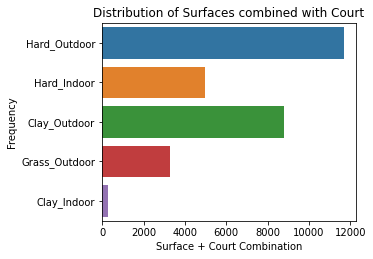

In [ ]:
plt.figure(figsize=(10, 8))
tourney_ids = df.surface_court.unique().tolist()
plt.subplot(2, 2, 1)
sns.countplot(y='surface_court', data=df)
plt.title('Distribution of Surfaces combined with Court')
plt.xlabel('Surface + Court Combination')
plt.ylabel('Frequency')
plt.show()

Extra features: `surface_court`, `A_matches_per_surface`, `B_matches_per_surface`, `A_wins_per_surface`, `B_wins_per_surface`, `A_losses_per_surface`, `B_losses_per_surface`, `A_finals_per_surface`, `B_finals_per_surface`, `A_titles_per_surface`, `B_titles_per_surface`, `A_surface_percentage`, `B_surface_percentage`

In order to achieve **symmetry**: `matches_per_surface`, `wins_per_surface`, `losses_per_surface`, `finals_per_surface`, `titles_per_surface`, `surface_advantage`, `surface_percentage`.

Common Oppopent Features:  `matches_per_surface_opp`, `wins_per_surface_opp`, `losses_per_surface_opp`, `finals_per_surface_opp`, `titles_per_surface_opp`, 

# 3. `draw_size`, `series`, `money_prize`, `tourney_date`, `year`, `month`, `day`, `match_num`, `best_of`, `round`


`tourney_date` = 20100103, while `year` = 2010, `month` = 01, `day` = 03.
I am considering of keeping just year and day. I will have to check it out with the predictions, to see which one is better. 

Extra features created: `A_round_wins`, `B_round_wins`, `A_round_losses`, `B_round_losses`, `A_round_matches`, `B_round_matches`, `A_round_percentage`, `B_round_percentage`

In order to achieve symmetry: `round_wins`, `round_losses`, `round_matches`, `round_percentage`

Common Opponent Features: `round_wins_opp`, `round_losses_opp`, `round_matches_opp` 

# 4. `A_id`, `B_id`, `A_name`, `B_name`, `A_hand`, `B_hand`


`id` and `name` have the same information. Drop `A_name`, `B_name`. 


In [ ]:
df.drop(columns=['A_name', 'B_name'], inplace=True)

Extra features created: `preferred_hand`

# 5. `A_ht`, `B_ht`, `A_ioc`, `B_ioc`, `A_age`, `B_age`
Extra features created: `home_advantage`
In order to achieve symmetry: `height`, `age`.

There are too many values for ioc, so I don't need it. I have already created a feature for Home Advantage for each player. 

In [ ]:
df.drop(columns=['A_ioc', 'B_ioc'], inplace=True)

# 6. `A_ace`, `B_ace`, `A_df`, `B_df`, `A_svpt`, `B_svpt`, `A_1stIn`, `A_1stWon`, `A_2ndWon`, `A_SvGms`, `B_SvGms`, `A_bpSaved`, `B_bpSaved`, `A_bpFaced`, `B_bpFaced`


Extra features created: `A_AceVsDf_percentage`, `B_AceVsDf_percentage`, `A_2ndIn`, `B_2ndIn`, `A_1stServeReturnPointsWon`, `B_1stServeReturnPointsWon`, `A_2ndServeReturnPointsWon`, `B_2ndServeReturnPointsWon`, `A_2ndWon_2ndIn_percentage`, `B_2ndWon_2ndIn_percentage`,  `A_1Won_1stIn_percentage`, `B_1stWon_1stIn_percentage`, `A_1stIn_1stServe_percentage`, `B_1stIn_1stServe_percentage`, `A_bpSaved_percentage`, `B_bpSaved_percentage`, `A_1stServe_percentage`, `B_1stServe_percentage`, `A_1stSPWon_percentage`, `B_1stSPWon_percentage`, `A_2ndSPWon_percentage`, `B_2ndSPWon_percentage`, `A_1stSRPWon`, `B_1stSRPWon`, `A_2ndSRPWon`, `B_2ndSRPWon`, `A_1stSRPWon_percentage`, `B_1stSRPWon_percentage`, `A_2ndSRPWon_percentage`, `B_2ndSRPWon_percentage`, `A_bpWon_percentage`, `B_bpWon_percentage`, `A_bpWon`, `B_bpWon`, `A_bpConv_percentage`, `B_bpConv_percentage`.

In order to achieve **symmetry**: `ace`, `df`, `svpt`, `1stIn`, `1stWon`, `2ndWon`, `SvGms`, `bpSaved`, `bpFaced`, `2ndIn`, `1stServeReturnPointsWon`, `2ndServeReturnPointsWon`, `1stSRPWon`, `2ndSRPWon`, `bpWon`

`AceVsDf_percentage`, `2ndWon_2ndIn_percentage`, `1Won_1stIn_percentage`, `1stIn_1stServe_percentage`, `bpSaved_percentage`, `1stServe_percentage`, `1stSPWon_percentage`, `2ndSPWon_percentage`, `1stSRPWon_percentage`, `2ndSRPWon_percentage`, `bpWon_percentage`, `bpConv_percentage`

Common Opponent features: `ace_opp`, `df_opp`, `svpt_opp`, `1stIn_opp`, `1stWon_opp`, `2ndWon_opp`, `SvGms_opp`, `bpSaved_opp`, `bpFaced_opp`, `2ndIn_opp`, `1stServeReturnPointsWon_opp`, `2ndServeReturnPointsWon_opp`, `1stSRPWon_opp`, `2ndSRPWon_opp`, `bpWon_opp`

# 7. `A_rank`, `B_rank`, `A_rank_points`, `B_rank_points`


Extra features created: `match_quality`, `A_rank_log`, `B_rank_log`, `A_rank_points_log`, `B_rank_points_log`, `A_elo_rating`, `B_elo_rating`. 

In order to achieve **symmetry**: 
`rank`, `rank_log`, `rank_points_log`, `elo_rating`.

# 8. `A_B365`, `B_B365`, `A_PS`, `B_PS`, `A_Max`, `B_Max`, `A_Avg`, `B_Avg`


Extra features created: `A_spread`, `B_spread`.

In order to achieve symmetry: `spread`, `B365`, `PS`, `Max`, `Avg`.

# 9. History - extra features created



`A_wins_career`, `B_wins_career`, `A_losses_career`, `B_losses_career`, `A_matches_career`, `B_matches_career`, `A_finals_career`, `B_finals_career`, `A_titles_career`, `B_titles_career`.

`A_wins_year`, `B_wins_year`, `A_losses_year`, `B_losses_year`, `A_matches_year`, `B_matches_year`, `A_finals_year`, `B_finals_year`, `A_titles_year`, `B_titles_year`.

`A_past_games_percentage`, `B_past_games_percentage`

`A_wins_semester`, `B_wins_semester`, `A_losses_semester`, `B_losses_semester`, `A_matches_semester`, `B_matches_semester`

`A_momentum`, `B_momentum`.

`A_wins_recent`, `B_wins_recent`, `A_losses_recent`, `B_losses_recent`, `A_matches_recent`, `B_matches_recent`.

`A_winning_streak`, `B_winning_streak`, `A_lossing_streak`, `B_lossing_streak`, `A_inactivity`, `B_inactivity`.

`headtohead`, `A_over_B`, `B_over_A`, `A_oppon_percentage`, `B_oppon_percentage`

In order to achieve **symmetry**: 
`wins_career`, `losses_career`, `matches_career`, `finals_career`, `titles_career`

`wins_year`, `losses_year`, `matches_year`, `finals_year`, `titles_year`

`past_games_percentage`

`wins_semester`, `losses_semester`, `matches_semester`

`momentum`

`wins_recent`, `losses_recent`, `matches_recent`

`winning_streak`, `lossing_streak`, `inactivity`

`oppon_percentage`


Common Opponent Features: 
`wins_career_opp`, `losses_career_opp`, `matches_career_opp`, `finals_career_opp`, `titles_career_opp`, `wins_year_opp`, `losses_year_opp`, `matches_year_opp`, `finals_year_opp`, `titles_year_opp`, `wins_semester_opp`, `losses_semester_opp`, `matches_semester_opp`, `wins_recent_opp`, `losses_recent_opp`, `matches_recent_opp`, `winning_streak_opp`, `lossing_streak_opp`, `inactivity_opp`

# Encoding

In [ ]:
df.describe(include='object')

,location,series,round,A_hand,B_hand,surface_court,preferred_hand
count,28990,28990,28990,28990,28990,28990,28990
unique,40,5,8,2,2,5,4
top,USA,ATP250,1st Round,R,R,Hard_Outdoor,RR
freq,6479,12500,13034,24886,24976,11680,21427


In [ ]:
cat_list_enc = ['series', 'round', 'location', 'surface_court', 'preferred_hand', 'A_hand', 'B_hand']

encoder = OrdinalEncoder()
df[cat_list_enc] = df[cat_list_enc].astype(str)
encoder.fit(df[cat_list_enc])
df[cat_list_enc] = encoder.transform(df[cat_list_enc])

In [ ]:
df.fillna(0, inplace=True)
df.replace(np.inf, 0, inplace=True)
df.replace(-np.inf, 0, inplace=True)

In [ ]:
Dataset_No1 = df[['A_id', 'B_id', 'tourney_id', 'A_wins_tour','B_wins_tour', 'A_losses_tour', 'B_losses_tour', 'A_matches_tour', 'B_matches_tour', 
                  'A_finals_tour', 'B_finals_tour', 'A_titles_tour', 'B_titles_tour', 'A_tour_percentage', 'B_tour_percentage',
                  'surface_court', 'A_matches_per_surface', 'B_matches_per_surface', 'A_wins_per_surface', 'B_wins_per_surface', 
                  'A_losses_per_surface', 'B_losses_per_surface', 'A_finals_per_surface', 'B_finals_per_surface', 
                  'A_titles_per_surface', 'B_titles_per_surface', 'A_surface_percentage', 'B_surface_percentage', 
                  'draw_size', 'series', 'money_prize', 'tourney_date', 'year', 'month', 'day', 'match_num', 'best_of', 'round',
                  'A_round_wins', 'B_round_wins', 'A_round_losses', 'B_round_losses', 'A_round_matches', 'B_round_matches', 'A_round_percentage', 'B_round_percentage',
                  'A_hand', 'B_hand', 'preferred_hand', 'A_ace', 'B_ace', 'A_df', 'B_df', 'A_svpt', 'B_svpt', 'A_1stIn', 'A_1stWon', 'A_2ndWon', 
                  'A_SvGms', 'B_SvGms', 'A_bpSaved', 'B_bpSaved', 'A_bpFaced', 'B_bpFaced', 'A_AceVsDf_percentage', 'B_AceVsDf_percentage', 'A_2ndIn', 'B_2ndIn',
                  'A_1stServeReturnPointsWon', 'B_1stServeReturnPointsWon', 'A_2ndServeReturnPointsWon', 'B_2ndServeReturnPointsWon', 
                  'A_2ndWon_2ndIn_percentage', 'B_2ndWon_2ndIn_percentage', 'A_1stWon_1stIn_percentage', 'B_1stWon_1stIn_percentage',
                  'A_1stIn_1stServe_percentage', 'B_1stIn_1stServe_percentage', 'A_bpSaved_percentage', 'B_bpSaved_percentage',
                  'A_1stServe_percentage', 'B_1stServe_percentage', 'A_1stSPWon_percentage', 'B_1stSPWon_percentage', 'A_2ndSPWon_percentage', 'B_2ndSPWon_percentage',
                  'A_1stSRPWon', 'B_1stSRPWon', 'A_2ndSRPWon', 'B_2ndSRPWon', 'A_1stSRPWon_percentage', 'B_1stSRPWon_percentage', 
                  'A_2ndSRPWon_percentage', 'B_2ndSRPWon_percentage', 'A_bpWon_percentage', 'B_bpWon_percentage', 'A_bpWon', 'B_bpWon', 
                  'A_bpConv_percentage', 'B_bpConv_percentage',
                  'match_quality', 'A_rank', 'B_rank', 'A_rank_points', 'B_rank_points', 'A_rank_log', 'B_rank_log', 'A_rank_points_log', 'B_rank_points_log',
                  'A_elo_rating', 'B_elo_rating', 'A_B365', 'B_B365', 'A_PS', 'B_PS', 'A_Max', 'B_Max', 'A_Avg', 'B_Avg', 'A_spread', 'B_spread',
                  'A_wins_career', 'B_wins_career', 'A_losses_career', 'B_losses_career', 'A_matches_career', 'B_matches_career', 'A_finals_career', 'B_finals_career',
                  'A_titles_career', 'B_titles_career', 'A_wins_year', 'B_wins_year', 'A_losses_year', 'B_losses_year', 'A_matches_year', 'B_matches_year', 
                  'A_finals_year', 'B_finals_year', 'A_titles_year', 'B_titles_year', 'A_past_games_percentage', 'B_past_games_percentage', 'A_wins_semester', 'B_wins_semester',
                  'A_losses_semester', 'B_losses_semester', 'A_matches_semester', 'B_matches_semester', 'A_momentum', 'B_momentum', 'A_wins_recent', 'B_wins_recent', 'A_losses_recent', 'B_losses_recent',
                  'A_matches_recent', 'B_matches_recent', 'A_winning_streak', 'B_winning_streak', 'A_lossing_streak', 'B_lossing_streak', 'A_inactivity', 'B_inactivity',
                  'headtohead', 'A_over_B', 'B_over_A', 'A_oppon_percentage', 'B_oppon_percentage', 'Label']]

# A_tour_percentage is calcualted based on A_wins_tour and A_matches. So maybe I consider dropping either A_wins_tour, A_matches_tour or A_tour_percentage
# tourney_date = year + month + day. I consider dropping.

Dataset_No2 = df[['A_id', 'B_id', 'tourney_id', 'wins_tour', 'losses_tour', 'matches_tour', 'finals_tour', 'titles_tour', 'tour_percentage',
                  'surface_court', 'matches_per_surface', 'wins_per_surface', 'losses_per_surface', 'finals_per_surface', 'titles_per_surface',
                  'surface_advantage', 'surface_percentage',
                  'draw_size', 'series', 'money_prize', 'tourney_date', 'year', 'month', 'day', 'match_num', 'best_of', 'round',
                  'round_wins', 'round_losses', 'round_matches', 'round_percentage', 'preferred_hand', 
                  'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced', '2ndIn', '1stServeReturnPointsWon', 
                  '2ndServeReturnPointsWon', '1stSRPWon', '2ndSRPWon', 'bpWon', 'aceVsDf_percentage', '2ndWon_2ndIn_percentage', '1stWon_1stIn_percentage',
                  '1stIn_1stServe_percentage', 'bpSaved_percentage', '1stServe_percentage', '1stSPWon_percentage', '2ndSPWon_percentage', '1stSRPWon_percentage',
                  '2ndSRPWon_percentage', 'bpWon_percentage', 'bpConv_percentage', 'match_quality', 'rank', 'rank_log', 'rank_points_log', 'spread', 'B365', 'PS', 'Max', 'Avg',
                  'wins_career', 'losses_career', 'matches_career', 'finals_career', 'titles_career', 'wins_year', 'losses_year', 'matches_year', 'finals_year', 'titles_year',
                  'past_games_percentage', 'wins_semester', 'losses_semester', 'matches_semester', 'momentum',
                  'wins_recent', 'losses_recent', 'matches_recent' , 'winning_streak', 'lossing_streak', 'inactivity', 'oppon_percentage', 'Label']]

# change opp stats where common opponents < 10 
Dataset_No3 = df[['A_id', 'B_id', 'tourney_id', 'wins_tour_opp', 'losses_tour_opp', 'matches_tour_opp', 'finals_tour_opp', 'titles_tour_opp', 'tour_percentage',
                  'surface_court', 'matches_per_surface_opp', 'wins_per_surface_opp', 'losses_per_surface_opp', 'finals_per_surface_opp', 
                  'titles_per_surface_opp', 'surface_advantage', 'surface_percentage',
                  'draw_size', 'series', 'money_prize', 'tourney_date', 'year', 'month', 'day', 'match_num', 'best_of', 'round',
                  'round_wins_opp', 'round_losses_opp', 'round_matches_opp', 'round_percentage', 'preferred_hand',
                  'ace_opp', 'df_opp', 'svpt_opp', '1stIn_opp', '1stWon_opp', '2ndWon_opp', 'SvGms_opp', 'bpSaved_opp', 'bpFaced_opp', '2ndIn_opp', 
                  '1stServeReturnPointsWon_opp', '2ndServeReturnPointsWon_opp', '1stSRPWon_opp', '2ndSRPWon_opp', 'bpWon_opp', 
                  'aceVsDf_percentage', '2ndWon_2ndIn_percentage', '1stWon_1stIn_percentage', '1stIn_1stServe_percentage', 'bpSaved_percentage',
                  '1stServe_percentage', '1stSPWon_percentage', '2ndSPWon_percentage', '1stSRPWon_percentage',
                  '2ndSRPWon_percentage', 'bpWon_percentage', 'bpConv_percentage', 'match_quality', 'rank', 'rank_log', 'rank_points_log', 'spread', 'B365', 'PS', 'Max', 'Avg',
                  'wins_career_opp', 'losses_career_opp', 'matches_career_opp', 'finals_career_opp', 'titles_career_opp', 'wins_year_opp', 'losses_year_opp', 
                  'matches_year_opp', 'finals_year_opp', 'titles_year_opp', 'past_games_percentage', 'wins_semester_opp', 'losses_semester_opp', 'matches_semester_opp',
                  'momentum', 'wins_recent_opp', 'losses_recent_opp', 'matches_recent_opp' , 'winning_streak_opp', 'lossing_streak_opp', 'inactivity_opp', 'oppon_percentage', 'Label']]

In [ ]:
def training(MODEL, X, y, SCALER, PCAer, n=50):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  
  if SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
  
  if PCAer == True:
    pca_tf = PCA(n_components=n)
    pca_tf.fit(X_train)
    X_train = pca_tf.transform(X_train)
    X_test = pca_tf.transform(X_test)

  model = MODEL
  start_time = datetime.datetime.now()
  model.fit(X_train, y_train)
  end_time = datetime.datetime.now()
  elapsed_time = end_time - start_time
  print('Training time:', str(elapsed_time))
  print()

  predict = model.predict(X_test)
  print("\nAccuracy               :", round(accuracy_score(y_test, predict) * 100, 3), '%.')
  print("Precision              :", round(precision_score(y_test, predict) * 100, 3), '%.')
  print("Recall Score           :", round(recall_score(y_test, predict) * 100, 3), '%.')
  print("F1 Score               :", round(f1_score(y_test, predict) * 100, 3), '%.')
  print("Log-Loss               :", round(log_loss(y_test, predict), 3), '.')
  print("Brier Score            :", round(brier_score_loss(y_test, predict) * 100, 3), '%.')
  print("Confusion Matrix")
  print(confusion_matrix(y_test, predict))

  print('\nTrain Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')

# Dataset No1

## `Logistic Regression()`

In Logistic Regression Enviroment Features should be ignored.

In [486]:
Dataset_No1.drop(columns=['tourney_id','surface_court','draw_size', 'series', 'money_prize', 'tourney_date', 'year', 'month', 
                          'day', 'match_num', 'best_of', 'round','match_quality'], inplace=True)

In [487]:
Dataset_No1.shape

(28990, 156)

### (A) `Baseline`: `train_test_split(test_size=0.3, random_state=0)` 
Accuracy=85.662% **With All Features**

In [489]:
eval_df = Dataset_No1.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=False, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression()
Training time: 0:00:01.045002


Accuracy               : 85.662 %.
Precision              : 86.123 %.
Recall Score           : 85.277 %.
F1 Score               : 85.698 %.
Log-Loss               : 4.952 .
Brier Score            : 14.338 %.
Confusion Matrix
[[3714  602]
 [ 645 3736]]

Train Score            : 85.502 %.
Test Score             : 85.662 %.

################################



### (B) `Baseline`: `train_test_split(test_size=0.3, random_state=0)` 
Accuracy=93.193% **With Optimized Features**

In [493]:
optimized_set_1 = df[['A_id', 'B_id','A_wins_tour', 'B_wins_tour', 'A_tour_percentage', 'B_tour_percentage', 'A_wins_per_surface', 'B_wins_per_surface',
                    'A_matches_per_surface', 'B_matches_per_surface', 'A_elo_rating', 'B_elo_rating','A_round_wins', 'B_round_wins',
                    'A_round_percentage', 'B_round_percentage', 'A_bpSaved', 'B_bpSaved','A_2ndServeReturnPointsWon', 'B_2ndServeReturnPointsWon', 'A_1stSPWon_percentage', 'B_1stSPWon_percentage', 
                    'A_2ndSPWon_percentage', 'B_2ndSPWon_percentage', 'A_1stSRPWon', 'B_1stSRPWon', 'A_1stSRPWon_percentage', 'B_1stSRPWon_percentage', 'A_2ndSRPWon_percentage', 'B_2ndSRPWon_percentage',
                    'A_bpWon', 'B_bpWon', 'A_bpConv_percentage', 'B_bpConv_percentage', 'A_wins_career', 'B_wins_career', 'A_finals_career', 'B_finals_career', 'A_titles_career', 'B_titles_career',
                    'A_wins_year', 'B_wins_year', 'A_losses_year', 'B_losses_year','A_finals_year', 'B_finals_year', 'A_wins_recent', 'B_wins_recent', 'A_matches_recent', 'B_matches_recent',
                    'A_lossing_streak', 'B_lossing_streak', 'A_inactivity', 'B_inactivity', 'headtohead', 'A_oppon_percentage', 'B_oppon_percentage',
                    'Label', 'preferred_hand']]

eval_df = optimized_set_1.copy()
y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=False, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression()
Training time: 0:00:00.542308


Accuracy               : 93.09 %.
Precision              : 94.138 %.
Recall Score           : 92.011 %.
F1 Score               : 93.062 %.
Log-Loss               : 2.387 .
Brier Score            : 6.91 %.
Confusion Matrix
[[4065  251]
 [ 350 4031]]

Train Score            : 92.603 %.
Test Score             : 93.09 %.

################################



### (C) `train_test_split(test_size=0.3, random_state=0)`, `scaler = True`
All Features: 98.425%, Optimized Set: 97,804%

In [494]:
eval_df = optimized_set_1.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

################ 
eval_df = Dataset_No1.copy()
y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression()
Training time: 0:00:00.348030


Accuracy               : 97.804 %.
Precision              : 98.117 %.
Recall Score           : 97.512 %.
F1 Score               : 97.813 %.
Log-Loss               : 0.759 .
Brier Score            : 2.196 %.
Confusion Matrix
[[4234   82]
 [ 109 4272]]

Train Score            : 97.679 %.
Test Score             : 97.804 %.

################################

Model:  LogisticRegression()
Training time: 0:00:00.851463


Accuracy               : 98.425 %.
Precision              : 98.737 %.
Recall Score           : 98.128 %.
F1 Score               : 98.432 %.
Log-Loss               : 0.544 .
Brier Score            : 1.575 %.
Confusion Matrix
[[4261   55]
 [  82 4299]]

Train Score            : 98.556 %.
Test Score             : 98.425 %.

################################



### (D) `train_test_split(test_size=0.3, random_state=0)`, `scaler = True`, `pca = True`, `n=125` 
Accuracy =98.425%

In [496]:
n_components = [10, 20, 45, 60, 85, 100, 125, 150]

eval_df = Dataset_No1.copy()
y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

accuracy_calc=0
for component in n_components:
  print('\nN_COMPONENTS = ', component)
  
  pca = PCA(n_components=component)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  model = LogisticRegression()
  model.fit(X_train, y_train)
  predict = model.predict(X_test)

  accuracy = accuracy_score(y_test, predict)
  print("\nAccuracy:", round(accuracy_score(y_test, predict) * 100, 3), '%.')
  print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
  print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
  if accuracy > accuracy_calc: 
    accuracy_calc = accuracy
    count = component
print('Higher Accuracy & Smaller Error ---> n_components=', count)


N_COMPONENTS =  10

Accuracy: 91.825 %.
Train Score            : 92.263 %.
Test Score             : 91.825 %.
Cross Val Score        : 83.087 %, deviation: 0.0533343663603962

N_COMPONENTS =  20

Accuracy: 94.964 %.
Train Score            : 94.964 %.
Test Score             : 94.964 %.
Cross Val Score        : 83.087 %, deviation: 0.0533343663603962

N_COMPONENTS =  45

Accuracy: 95.815 %.
Train Score            : 95.836 %.
Test Score             : 95.815 %.
Cross Val Score        : 83.087 %, deviation: 0.0533343663603962

N_COMPONENTS =  60

Accuracy: 96.344 %.
Train Score            : 96.482 %.
Test Score             : 96.344 %.
Cross Val Score        : 83.087 %, deviation: 0.0533343663603962

N_COMPONENTS =  85

Accuracy: 97.907 %.
Train Score            : 97.861 %.
Test Score             : 97.907 %.
Cross Val Score        : 83.087 %, deviation: 0.0533343663603962

N_COMPONENTS =  100

Accuracy: 98.091 %.
Train Score            : 98.083 %.
Test Score             : 98.091 %.
Cross Va

In [497]:
eval_df = Dataset_No1.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=True, PCAer=True, n=125)
print('\n################################\n')

Model:  LogisticRegression()
Training time: 0:00:01.971315


Accuracy               : 98.425 %.
Precision              : 98.67 %.
Recall Score           : 98.197 %.
F1 Score               : 98.433 %.
Log-Loss               : 0.544 .
Brier Score            : 1.575 %.
Confusion Matrix
[[4258   58]
 [  79 4302]]

Train Score            : 98.517 %.
Test Score             : 98.425 %.

################################



### (E) `train_test_split(test_size=0.3, random_state=0)`, `scaler = True`, `pca = False`. 
Hyperparameter Tuning:
* w/solver best accuracy = 98.77 (`newton-cg`)
* w/penalty best accuracy = 98.505 (tried `l2`)
* w/C best accuracy = 98.724 (`newton-cg`) and `C=0.001`

The main hyperparameters we may tune in logistic regression are: solver, penalty, and regularization strength.
* **Solver** is the algorithm to use in the optimization problem. The choices are `{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}`.

  * `lbfgs` relatively performs well compared to other methods and it saves a lot of memory. However, sometimes it may have issues with convergence.
  * `sag` is faster than the other solvers for large datasets, when both the number of samples and the number of features are large.
  * `saga` is the solver of choice for Sparse Multinomial Logistic Regression and it’s also suitable for very large datasets.
  * `newton-cg` is computationally expensive because of the Hessian Matrix.
  * `liblinear` is recommended when you have a high dimensional dataset - solving large-scale classification problems.

* **Penalty (or regularization)** intends to reduce model generalization error, and is meant to disincentivize and regulate overfitting. Technique discourages learning a more complex model, so as to avoid the risk of overfitting. The choices are: `{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}`. However, some penalties may not work with some solvers

* **C** (or **regularization strength**) must be a positive float. Regularization strength works with the penalty to regulate overfitting. Smaller values specify stronger regularization and high value tells the model to give high weight to the training data.


*Logistic regression offers other parameters like: `class_weight`, `dualbool` (for sparse datasets when n_samples > n_features), `max_iter` (may improve convergence with higher iterations), and others. However, these provide less impact.*

In [498]:
eval_df = Dataset_No1.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

# COMPARING SOLVERS
# penalty='none' is not supported for the liblinear solver
model_solver1 = LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000)
print('Model: ', str(model_solver1))
training(model_solver1, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver2 = LogisticRegression(solver='sag',penalty='none',max_iter=1000)
print('Model: ', str(model_solver2))
training(model_solver2, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver3 = LogisticRegression(solver='saga',penalty='none',max_iter=1000)
print('Model: ', str(model_solver3))
training(model_solver3, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver4 = LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000)
print('Model: ', str(model_solver4))
training(model_solver4, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression(max_iter=1000, penalty='none')
Training time: 0:00:08.253482


Accuracy               : 98.77 %.
Precision              : 99.036 %.
Recall Score           : 98.516 %.
F1 Score               : 98.776 %.
Log-Loss               : 0.425 .
Brier Score            : 1.23 %.
Confusion Matrix
[[4274   42]
 [  65 4316]]

Train Score            : 98.748 %.
Test Score             : 98.77 %.

################################

Model:  LogisticRegression(max_iter=1000, penalty='none', solver='sag')
Training time: 0:00:43.875868


Accuracy               : 98.448 %.
Precision              : 98.76 %.
Recall Score           : 98.151 %.
F1 Score               : 98.454 %.
Log-Loss               : 0.536 .
Brier Score            : 1.552 %.
Confusion Matrix
[[4262   54]
 [  81 4300]]

Train Score            : 98.561 %.
Test Score             : 98.448 %.

################################

Model:  LogisticRegression(max_iter=1000, penalty='none', solver='saga')
Training time: 0:00:46.

In [499]:
eval_df = Dataset_No1.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

# COMPARING SOLVERS WITH PENALTIES

model_solver1 = LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver1))
training(model_solver1, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver2 = LogisticRegression(solver='sag',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver2))
training(model_solver2, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver3 = LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver3))
training(model_solver3, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver4 = LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver4))
training(model_solver4, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver5 = LogisticRegression(solver='liblinear',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver5))
training(model_solver5, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression(max_iter=1000)
Training time: 0:00:02.069832


Accuracy               : 98.425 %.
Precision              : 98.759 %.
Recall Score           : 98.105 %.
F1 Score               : 98.431 %.
Log-Loss               : 0.544 .
Brier Score            : 1.575 %.
Confusion Matrix
[[4262   54]
 [  83 4298]]

Train Score            : 98.571 %.
Test Score             : 98.425 %.

################################

Model:  LogisticRegression(max_iter=1000, solver='sag')
Training time: 0:00:42.025600


Accuracy               : 98.402 %.
Precision              : 98.714 %.
Recall Score           : 98.105 %.
F1 Score               : 98.409 %.
Log-Loss               : 0.552 .
Brier Score            : 1.598 %.
Confusion Matrix
[[4260   56]
 [  83 4298]]

Train Score            : 98.507 %.
Test Score             : 98.402 %.

################################

Model:  LogisticRegression(max_iter=1000, solver='saga')
Training time: 0:00:47.888545


Accuracy               : 98.379 %.


In [500]:
eval_df = Dataset_No1.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

# COMPARING SOLVERS WITH C

model_solver1 = LogisticRegression(solver='lbfgs',penalty='none',C=0.001,max_iter=1000)
print('Model: ', str(model_solver1))
training(model_solver1, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver2 = LogisticRegression(solver='sag',penalty='none',C=0.001,max_iter=1000)
print('Model: ', str(model_solver2))
training(model_solver2, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver3 = LogisticRegression(solver='saga',penalty='none',C=0.001,max_iter=1000)
print('Model: ', str(model_solver3))
training(model_solver3, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

model_solver4 = LogisticRegression(solver='newton-cg',penalty='none',C=0.001,max_iter=1000)
print('Model: ', str(model_solver4))
training(model_solver4, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression(C=0.001, max_iter=1000, penalty='none')
Training time: 0:00:08.317995


Accuracy               : 98.77 %.
Precision              : 99.036 %.
Recall Score           : 98.516 %.
F1 Score               : 98.776 %.
Log-Loss               : 0.425 .
Brier Score            : 1.23 %.
Confusion Matrix
[[4274   42]
 [  65 4316]]

Train Score            : 98.748 %.
Test Score             : 98.77 %.

################################

Model:  LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='sag')
Training time: 0:00:41.349280


Accuracy               : 98.448 %.
Precision              : 98.76 %.
Recall Score           : 98.151 %.
F1 Score               : 98.454 %.
Log-Loss               : 0.536 .
Brier Score            : 1.552 %.
Confusion Matrix
[[4262   54]
 [  81 4300]]

Train Score            : 98.561 %.
Test Score             : 98.448 %.

################################

Model:  LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='sag

We can conclude that we did not gain any substantial benefit in building a better model while tuning the hyperparameters, and the classifier with default parameteres was strong enough by itself.

# Dataset No2

## `Logistic Regression()`

In [ ]:
Dataset_No2.shape

(28990, 91)

### (A) `Baseline`: `train_test_split(test_size=0.3, random_state=0)`
Accuracy=72.68% **With All Features**

In [ ]:
eval_df = Dataset_No2.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=False, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression()
Training time: 0:00:01.336096


Accuracy               : 72.68 %.
Precision              : 77.161 %.
Recall Score           : 65.008 %.
F1 Score               : 70.565 %.
Log-Loss               : 9.436 .
Brier Score            : 27.32 %.
Confusion Matrix
[[3473  843]
 [1533 2848]]

Train Score            : 71.793 %.
Test Score             : 72.68 %.

################################



### (B) `Baseline`: `train_test_split(test_size=0.3, random_state=0)` 
Accuracy=93.193% **With Optimized Features**

### (C) `train_test_split(test_size=0.3, random_state=0)`, `scaler = True`
Accuracy=98.114% **With All Features**

In [ ]:
eval_df = Dataset_No2.copy()
y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression()
Training time: 0:00:02.036215


Accuracy               : 98.114 %.
Precision              : 98.438 %.
Recall Score           : 97.809 %.
F1 Score               : 98.122 %.
Log-Loss               : 0.651 .
Brier Score            : 1.886 %.
Confusion Matrix
[[4248   68]
 [  96 4285]]

Train Score            : 98.187 %.
Test Score             : 98.114 %.

################################



### (D) `train_test_split(test_size=0.3, random_state=0)`, `scaler = True`, `pca = True`, `n=180`
Accuracy=98.187%

In [ ]:
n_components = [10, 20, 45, 60, 65, 80, 85, 90]

eval_df = Dataset_No2.copy()
y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

accuracy_calc=0
for component in n_components:
  print('\nN_COMPONENTS = ', component)
  
  pca = PCA(n_components=component)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  
  model = LogisticRegression()
  model.fit(X_train, y_train)
  predict = model.predict(X_test)

  accuracy = accuracy_score(y_test, predict)
  print("\nAccuracy:", round(accuracy_score(y_test, predict) * 100, 3), '%.')
  print('Train Score            :', round(model.score(X_train, y_train) * 100,3), '%.')
  print('Test Score             :', round(model.score(X_test, y_test) * 100, 3), '%.')
  print("Cross Val Score        :", round(cross_val_score(model, X, y, cv=3).mean() * 100,3), '%, deviation:', np.std(cross_val_score(model, X, y, cv=3)))
  if accuracy > accuracy_calc: 
    accuracy_calc = accuracy
    count = component
print('Higher Accuracy & Smaller Error ---> n_components=', count)


N_COMPONENTS =  10

Accuracy: 95.895 %.
Train Score            : 95.693 %.
Test Score             : 95.895 %.
Cross Val Score        : 71.838 %, deviation: 0.027547654173802567

N_COMPONENTS =  20

Accuracy: 96.47 %.
Train Score            : 96.191 %.
Test Score             : 96.47 %.
Cross Val Score        : 71.838 %, deviation: 0.027547654173802567

N_COMPONENTS =  45

Accuracy: 97.275 %.
Train Score            : 97.053 %.
Test Score             : 97.275 %.
Cross Val Score        : 71.838 %, deviation: 0.027547654173802567

N_COMPONENTS =  60

Accuracy: 97.861 %.
Train Score            : 97.837 %.
Test Score             : 97.861 %.
Cross Val Score        : 71.838 %, deviation: 0.027547654173802567

N_COMPONENTS =  65

Accuracy: 97.919 %.
Train Score            : 97.851 %.
Test Score             : 97.919 %.
Cross Val Score        : 71.838 %, deviation: 0.027547654173802567

N_COMPONENTS =  80

Accuracy: 98.114 %.
Train Score            : 98.187 %.
Test Score             : 98.114 %.
C

In [ ]:
eval_df = Dataset_No2.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

Model:  LogisticRegression()
Training time: 0:00:01.409033


Accuracy               : 98.114 %.
Precision              : 98.438 %.
Recall Score           : 97.809 %.
F1 Score               : 98.122 %.
Log-Loss               : 0.651 .
Brier Score            : 1.886 %.
Confusion Matrix
[[4248   68]
 [  96 4285]]

Train Score            : 98.187 %.
Test Score             : 98.114 %.

################################



### (E) `train_test_split(test_size=0.3, random_state=0)`, `scaler = True`, `pca = True`, `n = 80`. 
Hyperparameter Tuning:
* w/solver best accuracy = 98.321 (`lbfgs`)
* w/penalty best accuracy = 98.126 (tried `l2`)
* w/C best accuracy = 98.321 (`lbfgs-cg`) and `C=0.001`

In [ ]:
eval_df = Dataset_No2.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

# COMPARING SOLVERS
# penalty='none' is not supported for the liblinear solver
model_solver1 = LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000)
print('Model: ', str(model_solver1))
training(model_solver1, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver2 = LogisticRegression(solver='sag',penalty='none',max_iter=1000)
print('Model: ', str(model_solver2))
training(model_solver2, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver3 = LogisticRegression(solver='saga',penalty='none',max_iter=1000)
print('Model: ', str(model_solver3))
training(model_solver3, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver4 = LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000)
print('Model: ', str(model_solver4))
training(model_solver4, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

Model:  LogisticRegression(max_iter=1000, penalty='none')
Training time: 0:00:07.331689


Accuracy               : 98.321 %.
Precision              : 98.578 %.
Recall Score           : 98.083 %.
F1 Score               : 98.33 %.
Log-Loss               : 0.58 .
Brier Score            : 1.679 %.
Confusion Matrix
[[4254   62]
 [  84 4297]]

Train Score            : 98.364 %.
Test Score             : 98.321 %.

################################

Model:  LogisticRegression(max_iter=1000, penalty='none', solver='sag')
Training time: 0:00:28.298012


Accuracy               : 98.16 %.
Precision              : 98.439 %.
Recall Score           : 97.9 %.
F1 Score               : 98.169 %.
Log-Loss               : 0.635 .
Brier Score            : 1.84 %.
Confusion Matrix
[[4248   68]
 [  92 4289]]

Train Score            : 98.231 %.
Test Score             : 98.16 %.

################################

Model:  LogisticRegression(max_iter=1000, penalty='none', solver='saga')
Training time: 0:00:33.772

In [ ]:
eval_df = Dataset_No2.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

# COMPARING SOLVERS WITH PENALTIES

model_solver1 = LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver1))
training(model_solver1, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver2 = LogisticRegression(solver='sag',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver2))
training(model_solver2, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver3 = LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver3))
training(model_solver3, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver4 = LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver4))
training(model_solver4, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver5 = LogisticRegression(solver='liblinear',penalty='l2',max_iter=1000)
print('Model: ', str(model_solver5))
training(model_solver5, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

Model:  LogisticRegression(max_iter=1000)
Training time: 0:00:01.817623


Accuracy               : 98.114 %.
Precision              : 98.438 %.
Recall Score           : 97.809 %.
F1 Score               : 98.122 %.
Log-Loss               : 0.651 .
Brier Score            : 1.886 %.
Confusion Matrix
[[4248   68]
 [  96 4285]]

Train Score            : 98.187 %.
Test Score             : 98.114 %.

################################

Model:  LogisticRegression(max_iter=1000, solver='sag')
Training time: 0:00:24.312105


Accuracy               : 98.126 %.
Precision              : 98.438 %.
Recall Score           : 97.832 %.
F1 Score               : 98.134 %.
Log-Loss               : 0.647 .
Brier Score            : 1.874 %.
Confusion Matrix
[[4248   68]
 [  95 4286]]

Train Score            : 98.177 %.
Test Score             : 98.126 %.

################################

Model:  LogisticRegression(max_iter=1000, solver='saga')
Training time: 0:00:26.758076


Accuracy               : 98.114 %.


In [ ]:
eval_df = Dataset_No2.copy()

y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

# COMPARING SOLVERS WITH C

model_solver1 = LogisticRegression(solver='lbfgs',penalty='none',C=0.001,max_iter=1000)
print('Model: ', str(model_solver1))
training(model_solver1, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver2 = LogisticRegression(solver='sag',penalty='none',C=0.001,max_iter=1000)
print('Model: ', str(model_solver2))
training(model_solver2, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver3 = LogisticRegression(solver='saga',penalty='none',C=0.001,max_iter=1000)
print('Model: ', str(model_solver3))
training(model_solver3, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

model_solver4 = LogisticRegression(solver='newton-cg',penalty='none',C=0.001,max_iter=1000)
print('Model: ', str(model_solver4))
training(model_solver4, X, y, SCALER=True, PCAer=True, n=80)
print('\n################################\n')

Model:  LogisticRegression(C=0.001, max_iter=1000, penalty='none')
Training time: 0:00:05.638727


Accuracy               : 98.321 %.
Precision              : 98.578 %.
Recall Score           : 98.083 %.
F1 Score               : 98.33 %.
Log-Loss               : 0.58 .
Brier Score            : 1.679 %.
Confusion Matrix
[[4254   62]
 [  84 4297]]

Train Score            : 98.364 %.
Test Score             : 98.321 %.

################################

Model:  LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='sag')
Training time: 0:00:29.197188


Accuracy               : 98.16 %.
Precision              : 98.439 %.
Recall Score           : 97.9 %.
F1 Score               : 98.169 %.
Log-Loss               : 0.635 .
Brier Score            : 1.84 %.
Confusion Matrix
[[4248   68]
 [  92 4289]]

Train Score            : 98.231 %.
Test Score             : 98.16 %.

################################

Model:  LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='saga')

# Comparing with ***'Sports prediction and betting models in the machine learning age: The case of tennis'*** 2021 from Wilkens.
The paper uses a dataset that contains matches from years 2010-2019.

| Dataset | Model | Accuracy | Train Score | Test Score|
|---|---|---|---|---|
| 1 | Baseline LR| 65.713 %|66.887%|65.713%|
| 1 | Optimized LR| 94.812%|95.32%|94.81%|
| 2 | Baseline LR |64.323%|71.03%|69.323%|
| 2 | Optimized LR| 95.739%|95.921%|94.739%|
| 3 | Baseline LR |69.383%|70.971%|69.383%|
| 3 | Optimized LR| 92.799%|93.406%|92.799%|

### Dataset No1

In [ ]:
# using All features 
eval_df = Dataset_No1.copy()
eval_df = eval_df[eval_df['year']<=2019]
y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

# using Optimized Set 
eval_df = optimized_set_1[optimized_set_1['year']<=2019]
y = eval_df['Label']
eval_df.drop(columns=['Label'], inplace=True)
X = eval_df

baseline_model = LogisticRegression()
print('Model: ', str(baseline_model))
training(baseline_model, X, y, SCALER=True, PCAer=False)
print('\n################################\n')

Model:  LogisticRegression()
Training time: 0:00:00.790236


Accuracy               : 98.435 %.
Precision              : 98.56 %.
Recall Score           : 98.213 %.
F1 Score               : 98.386 %.
Log-Loss               : 0.541 .
Brier Score            : 1.565 %.
Confusion Matrix
[[3858   53]
 [  66 3627]]

Train Score            : 98.675 %.
Test Score             : 98.435 %.

################################

Model:  LogisticRegression()
Training time: 0:00:00.401554


Accuracy               : 97.962 %.
Precision              : 98.123 %.
Recall Score           : 97.671 %.
F1 Score               : 97.897 %.
Log-Loss               : 0.704 .
Brier Score            : 2.038 %.
Confusion Matrix
[[3842   69]
 [  86 3607]]

Train Score            : 97.852 %.
Test Score             : 97.962 %.

################################

